# House price predictions

## Import libraries and Read dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('dark_background')


In [2]:
bostonHouseFrame = pd.read_csv("housing.data.csv", sep="\s+")
bostonHouseFrame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Examining dataset

In [3]:
# Data types

bostonHouseFrame.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [4]:
# Statistics

bostonHouseFrame.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Computing basic statistics

<ipython-input-5-edebed621ba7>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  bostonHouseFrame.hist(ax = ax)


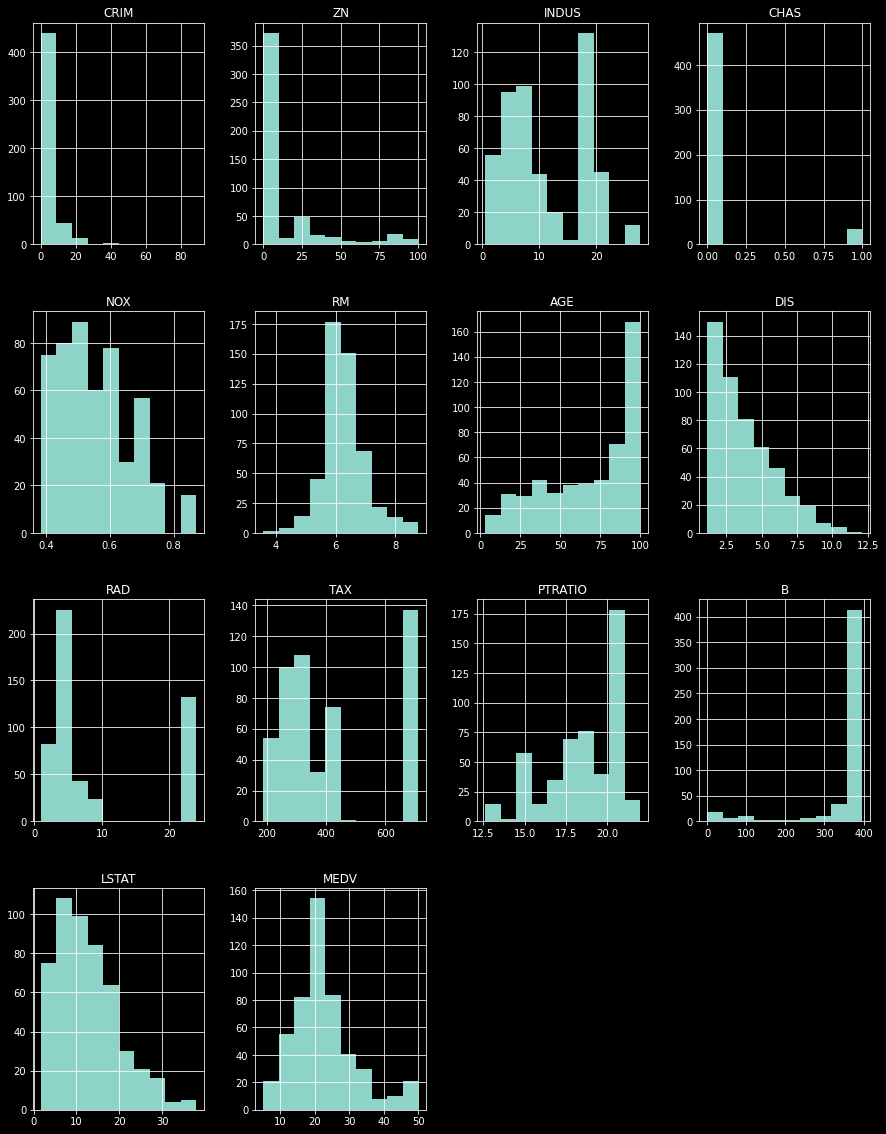

In [5]:
# Histogram plot

# plt.figure(figsize = [20,30])
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
bostonHouseFrame.hist(ax = ax)
plt.show()

# Skewed -> use log-normalization

Calculate histogram to see the patern distribution
-> Some value will be correlation to each other.
For ex: The age right-centered -> this dataset is focus on old population
Issue with scale (haven't normal distribution) [reference gussian distribution]

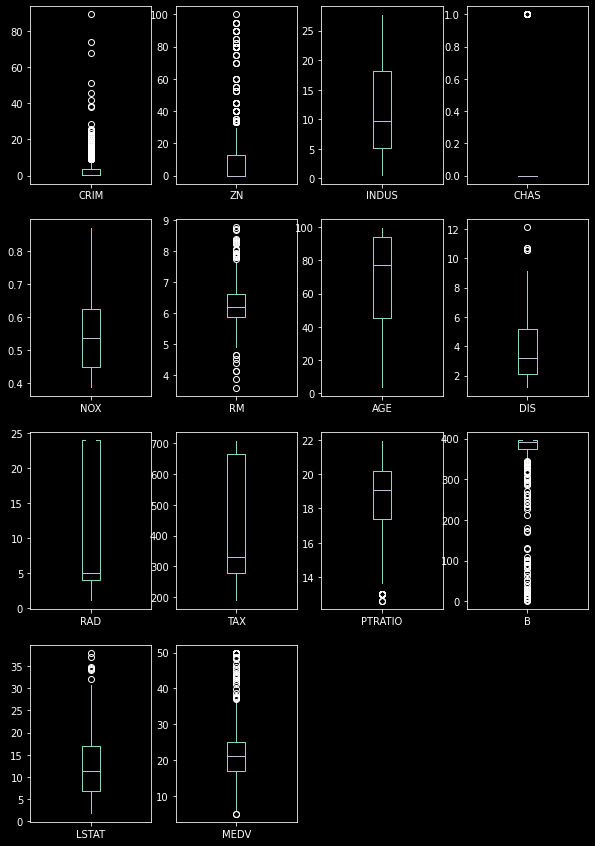

In [6]:
# Box plot: observe the outliner

bostonHouseFrame.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=[10,15])
plt.show()

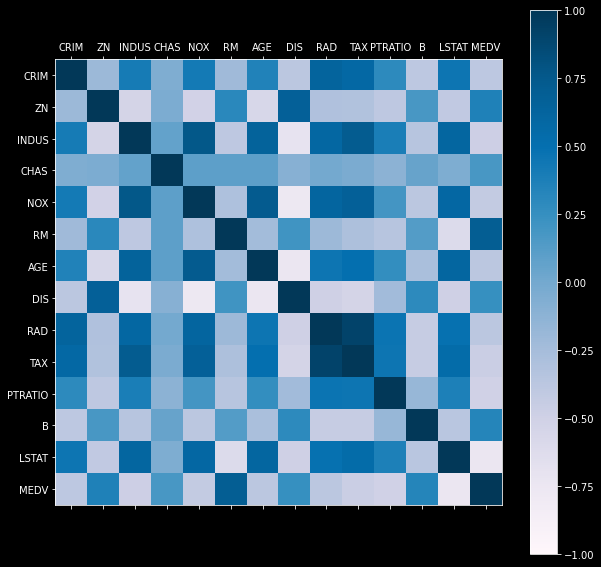

In [7]:
# Correlation plot
# Correlation does not imply causation
# Feature selection: look at the row and select the darkest/lightest

correlations = bostonHouseFrame.corr()
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1, cmap=plt.cm.PuBu)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(bostonHouseFrame.columns)
ax.set_yticklabels(bostonHouseFrame.columns)

plt.show()

## Slicing dataframes

In [8]:
# iloc: using index [prefered]
# iloc[row first, column second]: slice by row and column
bostonHouseFrame.iloc[2,:]

CRIM         0.02729
ZN           0.00000
INDUS        7.07000
CHAS         0.00000
NOX          0.46900
RM           7.18500
AGE         61.10000
DIS          4.96710
RAD          2.00000
TAX        242.00000
PTRATIO     17.80000
B          392.83000
LSTAT        4.03000
MEDV        34.70000
Name: 2, dtype: float64

In [9]:
# Loc: using the name

bostonHouseFrame.loc[0,['CRIM','DIS']]

CRIM    0.00632
DIS     4.09000
Name: 0, dtype: float64

In [10]:
# Return a series
bostonHouseFrame['MEDV']
bostonHouseFrame.MEDV

# Return a dataframe
bostonHouseFrame[['MEDV']]

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [11]:
# Select with conditon

bostonHouseFrame[bostonHouseFrame.AGE >= 20]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## Distribution with seaborn

C:\Users\luong\anaconda3\envs\Basic Tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

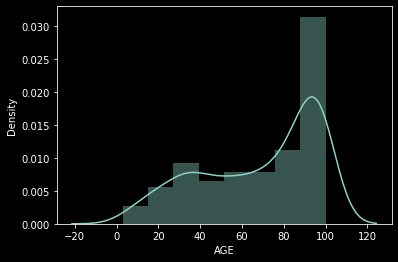

In [12]:
# Single distplot
sns.distplot(bostonHouseFrame.loc[:,'AGE'], hist=True)

In [13]:
# Displot all the dataframe

def displotsns(df, ncols):
    nrows = len(df.columns) // ncols + 1
    
    f, axes = plt.subplots(nrows, ncols, figsize=(20,15), sharex=False)
    row = 0
    plot = 0
    for c in df.columns:
        sns.distplot(df[c], hist=True, color = 'r', kde = True, ax = axes[row][plot])
        plot += 1
        if plot == ncols:
            plot = 0
            row+=1

C:\Users\luong\anaconda3\envs\Basic Tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\luong\anaconda3\envs\Basic Tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\luong\anaconda3\envs\Basic Tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

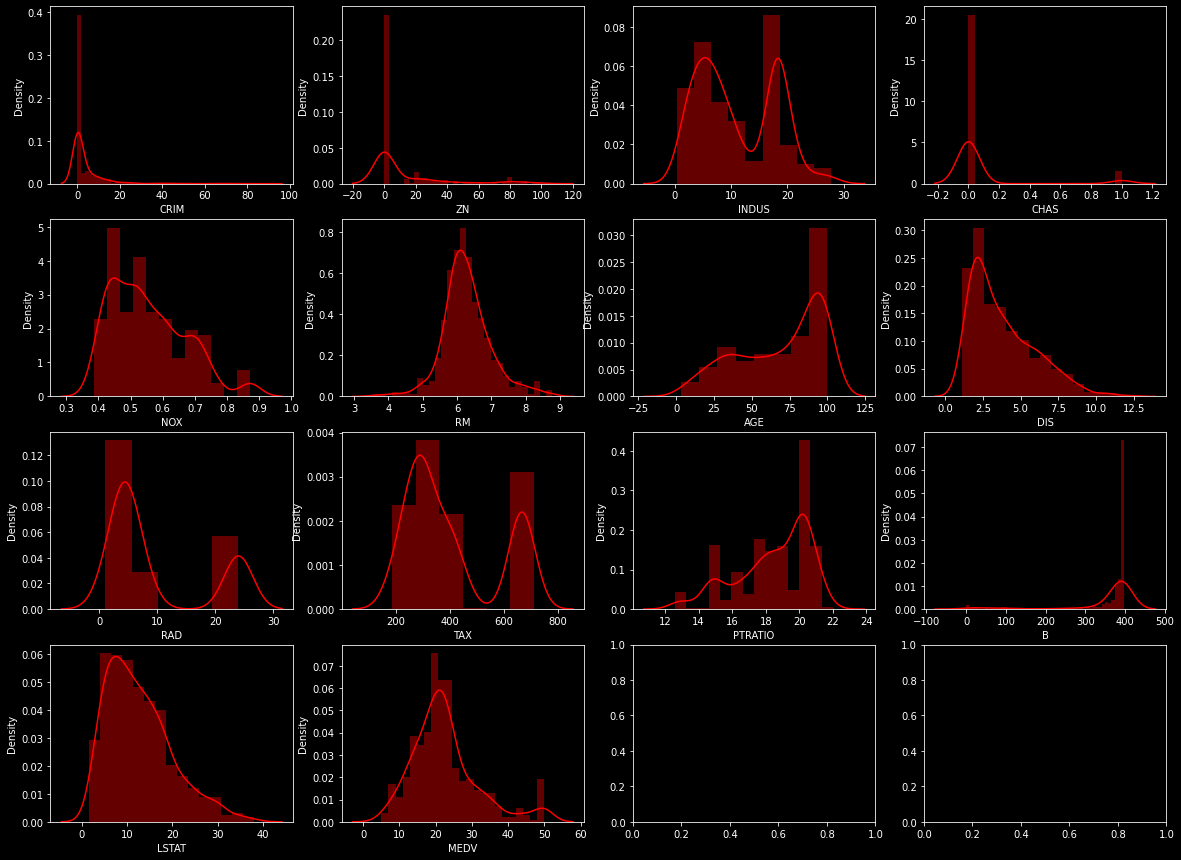

In [14]:
# Call function
displotsns(bostonHouseFrame,4)

In [15]:
def boxplotsns(df, ncols):
    nrows = len(df.columns) // ncols + 1
    
    f, axes = plt.subplots(nrows, ncols, figsize=(20,15), sharex=False, sharey=False, )
    row = 0
    plot = 0
    for c in df.columns:
        sns.boxplot(y = df[c], color = 'r',ax = axes[row][plot])
        plot += 1
        if plot == ncols:
            plot = 0
            row+=1
    

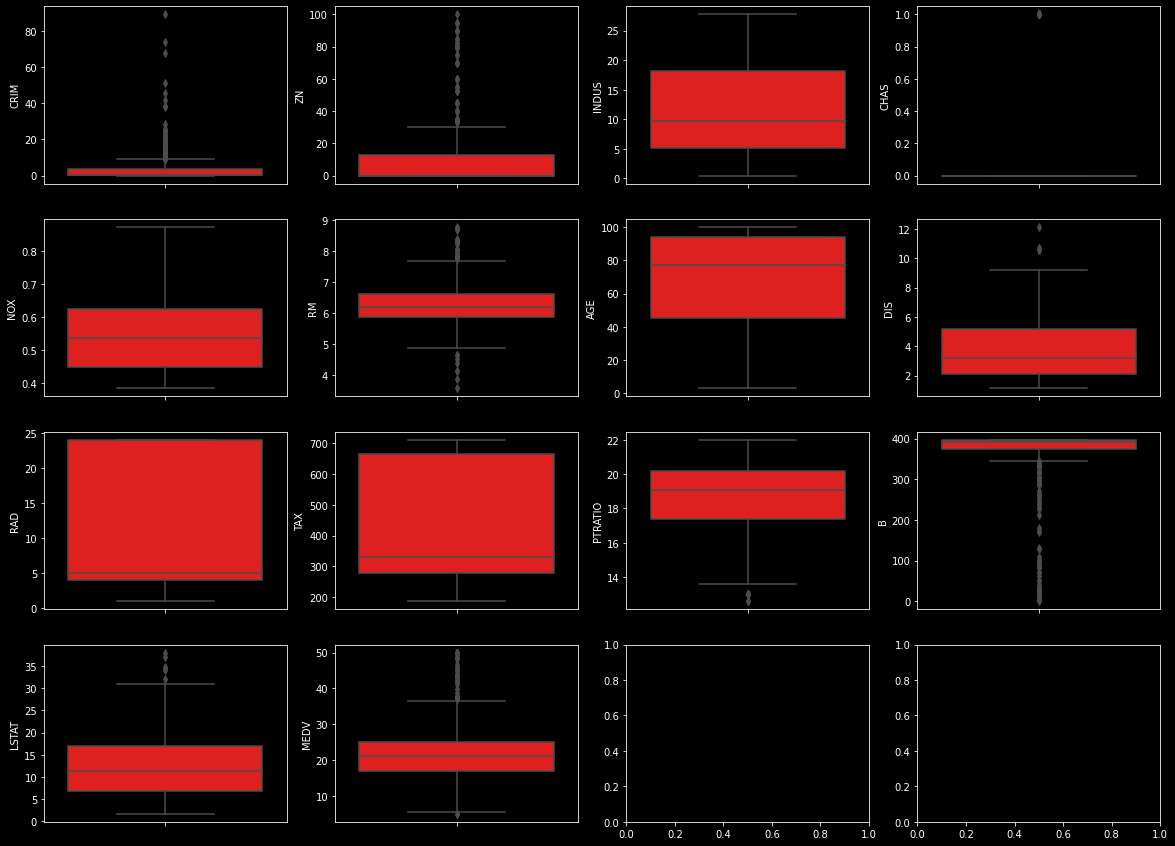

In [16]:
# Box plot
boxplotsns(bostonHouseFrame,4)

<AxesSubplot:>

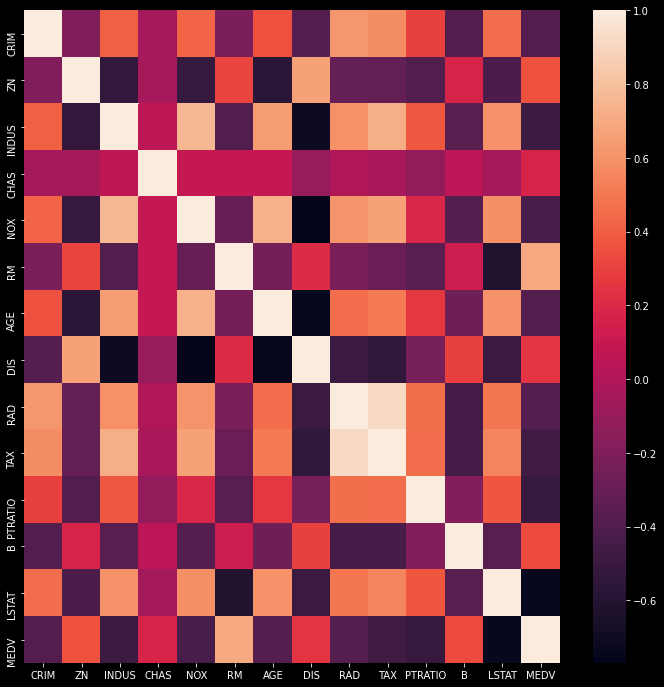

In [17]:
# Pre-computed the correlation matrix: correlations = bostonHouseFrame.corr()

fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(correlations, ax = ax)